<a href="https://www.kaggle.com/code/muhammedesadseker/knn-algorithm-tutorial?scriptVersionId=134719212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


# import and prepare the data

In [2]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
data["class"] = [1 if i== "Abnormal" else 0 for i in data["class"]]
data["pelvic_incidence"] = data["pelvic_incidence"].astype(int)
data["pelvic_tilt numeric"] = data["pelvic_tilt numeric"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    int64  
 1   pelvic_tilt numeric       310 non-null    int64  
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 17.1 KB


# Data Visualization for understanding the data

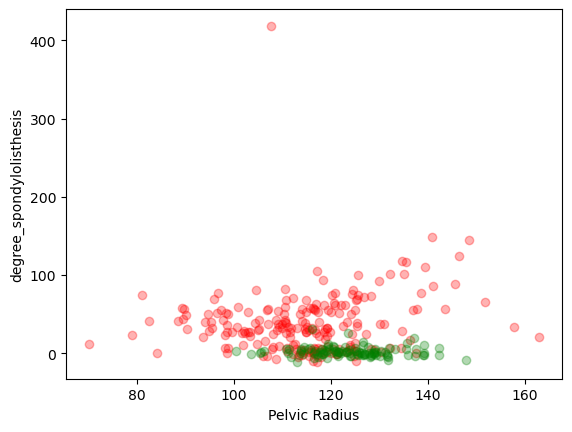

In [3]:
M = data[data["class"] == 1]
B = data[data["class"] == 0]

plt.scatter(M["pelvic_radius"], M["degree_spondylolisthesis"], color="red", label="Malignant", alpha=0.3)
plt.scatter(B["pelvic_radius"], B["degree_spondylolisthesis"], color="green", label="Benign", alpha=0.3)
plt.xlabel("Pelvic Radius")
plt.ylabel("degree_spondylolisthesis")
plt.show()

In [4]:
y = data["class"].values
x_data = data.drop(["class"],axis=1)

# Normalization

In [5]:
x = (x_data- np.min(x_data))/(np.max(x_data)-np.min(x_data))
x.head()

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.359223,0.509091,0.229180,0.250857,0.307461,0.025148
1,0.126214,0.290909,0.098578,0.144629,0.476649,0.036365
2,0.407767,0.509091,0.322995,0.307661,0.386097,0.017523
3,0.417476,0.545455,0.271260,0.289436,0.341826,0.051838
4,0.223301,0.272727,0.128129,0.247022,0.409579,0.044173


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
n = 4
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("{} nn score {}".format(n,knn.score(x_test,y_test)))

4 nn score 0.7419354838709677


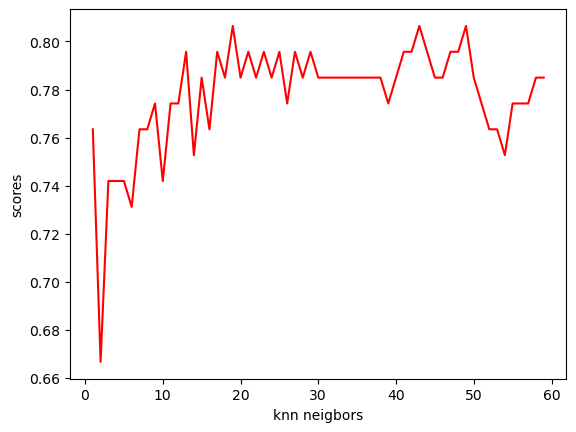

Our max score for 19 neighbors is 0.8064516129032258


In [8]:
range_ = range(1,60)
score = []
for i in range_:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score.append(knn2.score(x_test,y_test))
plt.plot(range_,score,color="red")
plt.xlabel("knn neigbors")
plt.ylabel("scores")
plt.show()
print("Our max score for {} neighbors is {}".format(range_[score.index(max(score))], max(score)))

# conclusion 
* if knn neigbors value is 19, our test result will be the best